In [5]:
import pandas as pd



In [6]:
path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-05 WRA data\2FC19 NJORO DISCHARGES.xlsx"

In [11]:
# Load your dataset
df = pd.read_excel(path, skiprows=1)

# Convert datetime column (assume it's the first column)
df.columns = ['datetime', 'discharge']
df['datetime'] = pd.to_datetime(df['datetime'])

# Replace 1e-30 values with 0
df['discharge'] = df['discharge'].replace(-1e-30, 0)

# Define a custom aggregation function
def custom_daily_agg(x):
    if (x >= 0.01).all():
        return x.mean()
    else:
        return x.max()

# Group by date only (drop time part) and apply the function
df['date'] = df['datetime'].dt.date
daily_discharge = df.groupby('date')['discharge'].apply(custom_daily_agg).reset_index()

# Optionally, convert 'date' back to datetime
daily_discharge['date'] = pd.to_datetime(daily_discharge['date'])

# Rename column if desired
daily_discharge.columns = ['date', 'daily_discharge']

In [12]:
display(daily_discharge)

,date,daily_discharge
0,2005-01-01,0.000000
1,2005-01-02,0.000000
2,2005-01-03,0.000000
3,2005-01-04,0.000000
4,2005-01-05,0.000000
...,...,...
5381,2020-06-26,5.140952
5382,2020-06-27,5.140952
5383,2020-06-28,4.883957
5384,2020-06-29,4.637344


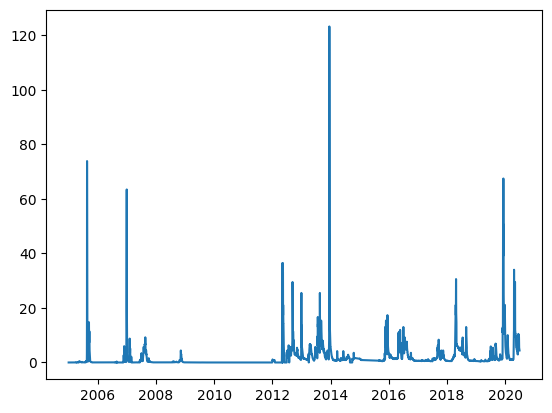

In [13]:
import matplotlib.pyplot as plt

plt.plot(daily_discharge['date'], daily_discharge['daily_discharge'])

In [ ]:
# Save to Excel
daily_discharge.to_excel("daily_discharge.xlsx", index=False)